<a href="https://colab.research.google.com/github/zbrze/MOWNIT-python-/blob/master/lab13.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Zadanie 1

Zaimplementuj generator liniowy kongruentny wg wzoru:
$$X_{i+1}=(aX_i+c)\ mod\ m$$
Generator ma zwracać wartości w zakresie [0...1], wartości startowe wg własnego wyboru. 

Przetestuj jego działanie dla różnych zestawów parametrów:

|     a         |   c           | m         |
| ------------- |:-------------:| ---------:|
|  1103515245   | 12345         |$$2^{32}$$ |
| 1229          | 1             | $$2048$$  |
| 1597          | 51749         | $$24494$$ |
| $2^{16}+3$    | 0             | $ 2^{31}$ |

Zwizualizuj rozkład generowanych liczby (histogram lub lepiej chmura punktów 2-D lub 3D ($X_i, X_{i+1}$), ($X_i, X_{i+1}, X_{i+2}$)). Oceń jakość generowanych rozkładów. 

In [0]:
import matplotlib
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
def generate_rand(a, c, m, x0, len):
  num = []
  xi = x0
  for i in range(len):
    x = (a*xi + c) % m;
    num.append(x/m)
    xi = x
  return num

a =  1103515245 | c =  12345 | m =  4294967296
[0.36784967547282577, 0.752568689873442, 0.18502330128103495, 0.6438529670704156, 0.700689495075494, 0.8271629854571074, 0.5516342110931873, 0.6048832109663635, 0.7459362330846488, 0.00678625307045877, 0.7196821859106421, 0.7073206913191825, 0.9746599406935275, 0.2461062993388623, 0.21097084321081638, 0.7336435022298247, 0.10580588271841407, 0.5904548407997936, 0.3066231058910489, 0.8200246535707265, 0.4911432680673897, 0.7914891249965876, 0.6854479014873505, 0.944552285829559, 0.11251866770908237, 0.16406448907218874, 0.8542990488931537, 0.2425983224529773, 0.2382891201414168, 0.7936928558629006, 0.292301332578063, 0.6337105596903712, 0.5358099243603647, 0.9539621674921364, 0.9808187643066049, 0.9944031939376146, 0.18685212032869458, 0.34329175646416843, 0.7410400323569775, 0.8612207865808159, 0.30282465694472194, 0.5003986542578787, 0.5510561382398009, 0.398450666340068, 0.686676247511059, 0.5078498374205083, 0.7643052209168673, 0.114858

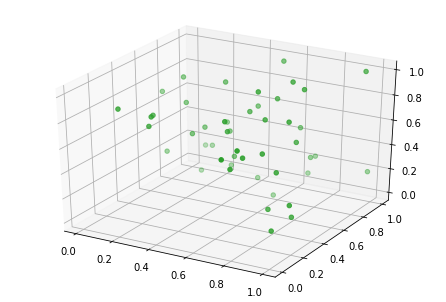

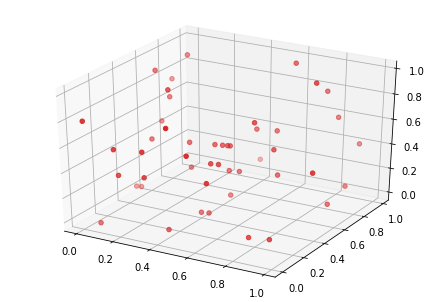

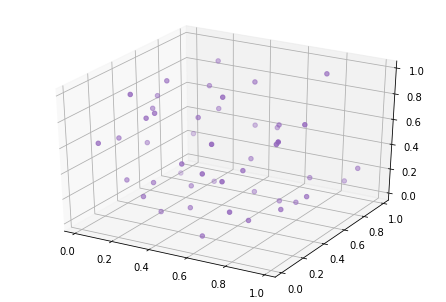

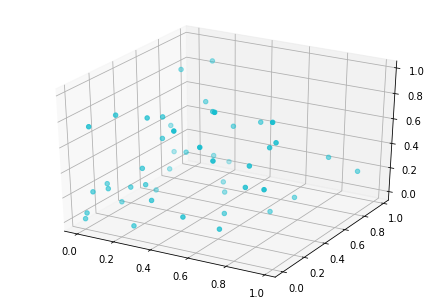

In [41]:
a = [1103515245, 1229, 1597, 2**16+3]
c = [12345, 1, 51749, 0]
m = [2**32, 2048, 24494, 2**31]
color = ['#2ca02c', '#d62728', '#9467bd', '#17becf']
for i in range(0, 4):
  print("a = ", a[i],"| c = ", c[i], "| m = ", m[i])
  arr = generate_rand(a[i], c[i], m[i], 17, 50)
  print(arr, "\n")
  x = [arr[i] for i in range(0, len(arr) - 2)]
  y = [arr[i] for i in range(1, len(arr) - 1)]
  z = [arr[i] for i in range(2, len(arr))] 
  fig = plt.figure()
  ax = Axes3D(fig)
  ax.scatter(x, y, z, c= color[i])
  fig.show()

### Zadanie 2
Zapoznaj się z generetorem dostępnym w bibliotece numpy. Opisz krótko jaki to generator i jak działa. Przeanalizuj generowany przez niego rozkład podobnie jak w poprzednim zadaniu. 

In [42]:
from numpy import random
print("random.rand - Random values in a given shape.", random.rand(5))
print("random.randn - Return a sample (or samples) from the “standard normal” distribution. ", random.randn(5))
print("random.random - Return random floats in the half-open interval [0.0, 1.0). ", random.random(5))
print("random.ranf - Return random floats in the half-open interval [0.0, 1.0)  ", random.ranf(5) )
print("random.RandomState  ", random.RandomState(4) )

random.rand - Random values in a given shape. [0.90896643 0.16009669 0.06225686 0.88994872 0.855076  ]
random.randn - Return a sample (or samples) from the “standard normal” distribution.  [-0.63304417 -1.46161155  0.54774252 -1.7088782   1.05782187]
random.random - Return random floats in the half-open interval [0.0, 1.0).  [0.20300636 0.4197797  0.14653138 0.04639015 0.30776664]
random.ranf - Return random floats in the half-open interval [0.0, 1.0)   [0.90421683 0.73475298 0.60870456 0.90355414 0.27225715]
random.RandomState   RandomState(MT19937)


Biblioteka numpy jako generatora liczb pseudolosowych używa algorytmu MT19937, czyli generatora Mersenne Twister, generuje on  32-bitowe liczby całkowite z przedziału $[0, 2^{32} − 1] $

Jako długość okresu wybierana jest liczba pierwsza Mersenne’a
(liczby postaci $M_{n}=2^{n}-1$, gdzie $n$ jest liczbą naturalną)

Zalety:

*   Posiada wysoki stopień równomiernego rozmieszczenia
*   Spełnia większość testów losowości



[0.23529933 0.80872559 0.82586334 0.68339269 0.30846836 0.44995727
 0.31984131 0.09112815 0.02847662 0.89748712 0.42648346 0.02135584
 0.55756105 0.44377871 0.18976407 0.86858625 0.43821387 0.93905156
 0.11347602 0.24642685 0.95139986 0.45758743 0.96362338 0.14464413
 0.56949777 0.10944724 0.79723587 0.82949443 0.0613068  0.41499307
 0.34077085 0.01804341 0.07184767 0.26625078 0.36922455 0.91975648
 0.70602204 0.79163329 0.53636016 0.74921516 0.7032903  0.24762901
 0.63671633 0.26639586 0.29498718 0.92934011 0.90511779 0.61617875
 0.21992049 0.38346982 0.92104795 0.47623353 0.12414386 0.13543384
 0.75565562 0.86737902 0.91010719 0.85965133 0.85264371 0.32155196] 



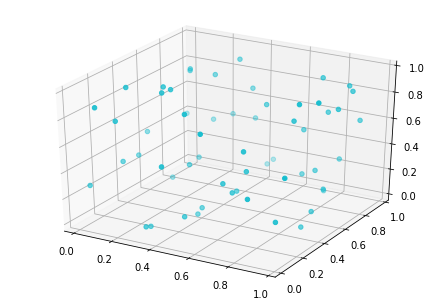

In [43]:
arr = random.ranf(60)
print(arr, "\n")
x = [arr[i] for i in range(0, len(arr) - 2)]
y = [arr[i] for i in range(1, len(arr) - 1)]
z = [arr[i] for i in range(2, len(arr))] 
fig = plt.figure()
ax = Axes3D(fig)
ax.scatter(x, y, z, c= color[i])
fig.show()

### Zadanie 3
Zaimplementuj metodą całkowania Monte Carlo i zastosuj ją wobec następujących całek:
$$ \int_1^2 \frac{1}{x^2}\ dx $$
$$ \int_1^6 \frac{1}{\sqrt{x^5+8}}\ dx $$
$$ \int_1^{22} x^2+2x\ dx $$
Oblicz także objętości brył:
- kula o promioniu 5
- stożek o wysokości 10 i promieniu podstawy 10
- bryła będąca różnicą kuli o promieniu 10 i walca o wysokości 6 i promieniu podstawy 3; środek walca pokrywa się z środkiem kuli.

Przeanalizuj jak wybór liczby próbek wpływa na wyniki obliczeń. 


In [0]:
from scipy import integrate
def Monte_Carlo(f, a, b, n):
  randoms = []
  res = 0.0
  for i in range(n):
    rand_x = random.uniform(a, b)
    res += f(rand_x)
  return res/n * (b - a) 

In [0]:
def relative_error(val, real_val):
  return abs(val - real_val)/abs(real_val)

### $ \int_1^2 \frac{1}{x^2}\ dx $

In [46]:
n = [50, 100, 1000, 100000, 1000000]
real_value = integrate.quad(lambda x: 1/(x**2), 1, 2)[0]
print("real value = ", real_value, "\n\n")
for i in range(0, len(n)):
  x = Monte_Carlo(lambda x: 1/(x**2), 1, 2, n[i])
  print(n[i], " samples\nintegral: ",x, "\nrelative effor: ", relative_error(x, real_value), "\n")

real value =  0.49999999999999994 


50  samples
integral:  0.4974429107433537 
relative effor:  0.005114178513292545 

100  samples
integral:  0.5071915534273324 
relative effor:  0.01438310685466482 

1000  samples
integral:  0.5025091108583314 
relative effor:  0.005018221716662886 

100000  samples
integral:  0.4991964978274765 
relative effor:  0.0016070043450469031 

1000000  samples
integral:  0.49993407975947285 
relative effor:  0.0001318404810541907 




### $ \int_1^6 \frac{1}{\sqrt{x^5+8}}\ dx $

In [47]:
real_value = integrate.quad(lambda x:1/(np.sqrt(x**5 + 8)), 1, 6)[0]
print("real value = ", real_value, "\n\n")
for i in range(0, len(n)):
  x = Monte_Carlo(lambda x: 1/(np.sqrt(x**5 + 8)), 1, 6, n[i])
  print(n[i], " samples\nintegral: ",x, "\nrelative effor: ", relative_error(x, real_value), "\n")

real value =  0.43505972001144366 


50  samples
integral:  0.3821340077985509 
relative effor:  0.12165160270755618 

100  samples
integral:  0.4389246887468778 
relative effor:  0.008883765969721269 

1000  samples
integral:  0.4327585038065561 
relative effor:  0.005289426023689382 

100000  samples
integral:  0.4351896719194359 
relative effor:  0.00029869901076761546 

1000000  samples
integral:  0.43490982641368725 
relative effor:  0.0003445356829459395 



### $ \int_1^{22} x^2+2x\ dx $

In [48]:
real_value = integrate.quad(lambda x:(x**2 + 2*x), 1, 22)[0]
print("real value = ", real_value, "\n\n")
for i in range(0, len(n)):
  x = Monte_Carlo(lambda x:(x**2 + 2*x), 1, 22, n[i])
  print(n[i], " samples\nintegral: ",x, "\nrelative effor: ", relative_error(x, real_value), "\n")

real value =  4031.9999999999995 


50  samples
integral:  3610.976316914591 
relative effor:  0.10442055632078591 

100  samples
integral:  3998.834254462328 
relative effor:  0.008225631333747938 

1000  samples
integral:  4046.5452916574927 
relative effor:  0.0036074632087036663 

100000  samples
integral:  4052.419091685757 
relative effor:  0.005064258850634275 

1000000  samples
integral:  4034.836342462305 
relative effor:  0.0007034579519606426 



### Kula o promieniu 5

In [0]:
def Sphere_volume(R, n):
  res = 0.0
  x = []
  y = []
  z = []
  for i in range(n):
    rand_x = random.uniform(-R, R)
    rand_y = random.uniform(-R, R)
    rand_z = random.uniform(-R, R)
    if(rand_x**2 + rand_y**2 + rand_z**2 <= R**2):
      res +=1
      x.append(rand_x)
      y.append(rand_y)
      z.append(rand_z)
  return res/n * (2*R)**3, x, y, z


real value =  523.5987755982989 


50  samples
volume:  480.0 
relative effor:  0.08326752779068283 

100  samples
volume:  570.0 
relative effor:  0.08861981074856413 

1000  samples
volume:  521.0 
relative effor:  0.004963295789470331 

100000  samples
volume:  522.0 
relative effor:  0.003053436472367587 



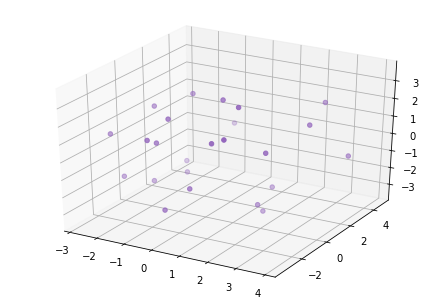

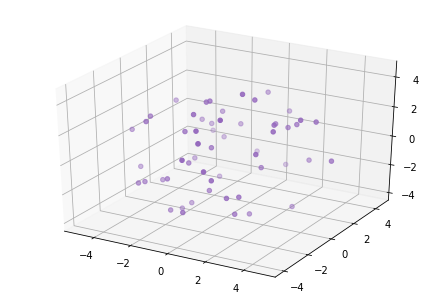

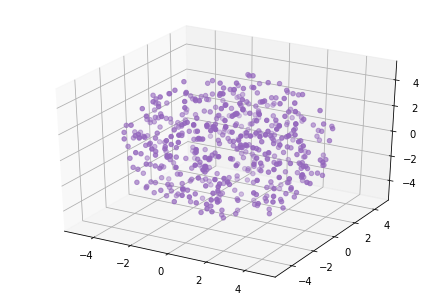

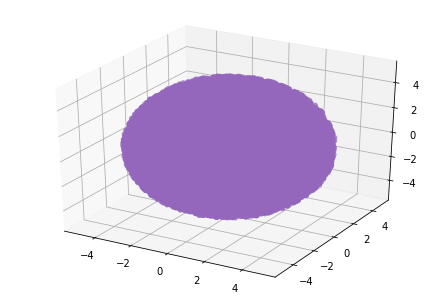

In [50]:
import math
n = [50, 100, 1000, 100000]
real_value = math.pi * 4/3 * (5**3)
print("real value = ", real_value, "\n\n")
for i in range(0, len(n)):
  r,x, y, z = Sphere_volume(5, n[i])
  print(n[i], " samples\nvolume: ",r, "\nrelative effor: ", relative_error(r, real_value), "\n")
  fig = plt.figure()
  ax = Axes3D(fig)
  ax.scatter(x, y, z, c= '#9467bd')
  fig.show()

### Stożek o wysokości 10 i promieniu podstawy 10

In [0]:
 def Cone_volume(R, H, n):
  res = 0.0
  x = []
  y = []
  z = []
  for i in range(n):
    rand_x = random.uniform(-R, R)
    rand_y = random.uniform(-R, R)
    rand_z = random.uniform(0, H)
    if(rand_x ** 2 + rand_y ** 2 <= ((rand_z*R)/H) ** 2):
      res +=1
      x.append(rand_x)
      y.append(rand_y)
      z.append(rand_z)
  return res/n * H*(2*R)**2, x, y, z 

real value =  1047.1975511965977 


50  samples
volume:  960.0 
relative effor:  0.08326752779068283 

100  samples
volume:  1080.0 
relative effor:  0.03132403123548181 

1000  samples
volume:  992.0 
relative effor:  0.052709778717038934 

100000  samples
volume:  1043.8400000000001 
relative effor:  0.0032062252177356677 



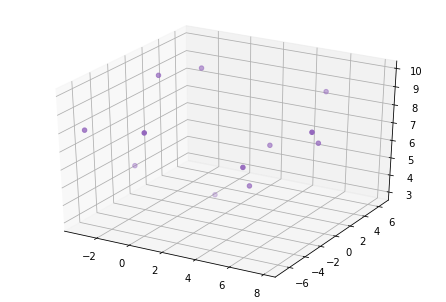

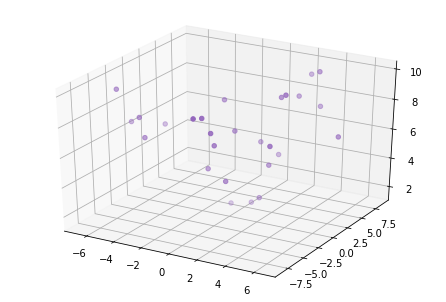

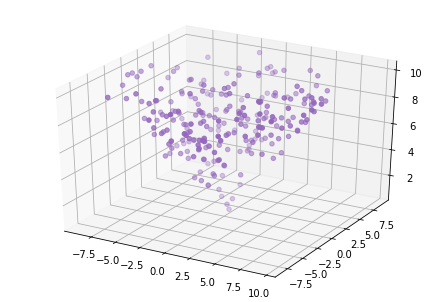

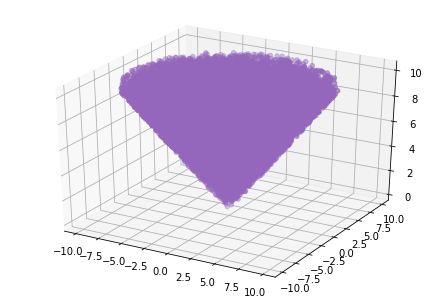

In [52]:

real_value = math.pi * 1/3 * (10**2) *10
print("real value = ", real_value, "\n\n")
for i in range(0, len(n)):
  r, x, y, z = Cone_volume(10, 10, n[i])
  print(n[i], " samples\nvolume: ",r, "\nrelative effor: ", relative_error(r, real_value), "\n")
  fig = plt.figure()
  ax = Axes3D(fig)
  ax.scatter(x, y, z, c= '#9467bd')
  fig.show()

### Bryła będąca różnicą kuli o promieniu 10 i walca o wysokości 6 i promieniu podstawy 3; środek walca pokrywa się z środkiem kuli.

In [0]:
def Difference_volume(R, r, H, n):
  res = 0.0
  x = []
  y = []
  z = []
  for i in range(n):
    rand_x = random.uniform(-R, R)
    rand_y = random.uniform(-R, R)
    rand_z = random.uniform(-R, R)
    if(rand_x**2 + rand_y**2 + rand_z**2 <= R**2 and not(rand_x**2 + rand_y**2 <= r**2 and rand_z <= H/2 and rand_z >= - H/2)):
      res +=1
      x.append(rand_x)
      y.append(rand_y)
      z.append(rand_z)
  return res/n * (2*R)**3, x, y, z 

real value =  4019.144201492542 


50  samples
volume:  3520.0 
relative effor:  0.12419166281896048 

100  samples
volume:  4400.0 
relative effor:  0.0947604214762994 

1000  samples
volume:  4296.0 
relative effor:  0.06888426605958686 

100000  samples
volume:  4011.6800000000003 
relative effor:  0.0018571619027179323 



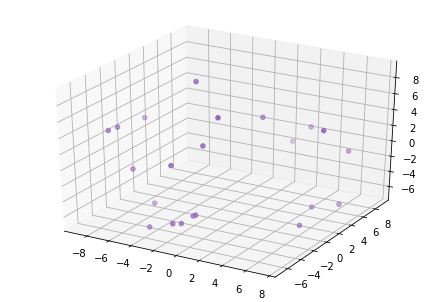

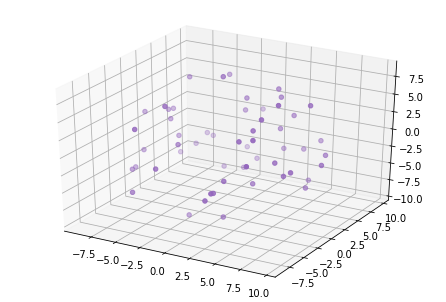

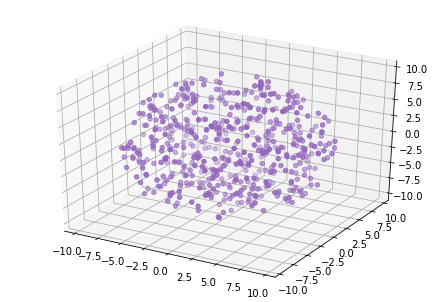

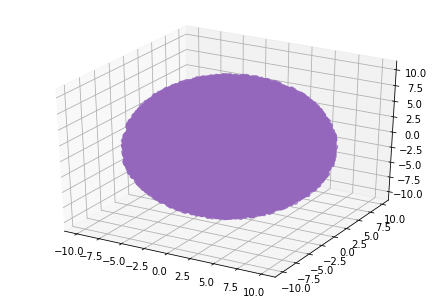

In [54]:

real_value = math.pi * (4/3 * 10**3 - 6 * 3**2) 
print("real value = ", real_value, "\n\n")
for i in range(0, len(n)):
  r, x, y, z = Difference_volume(10, 3, 6, n[i])
  print(n[i], " samples\nvolume: ", r, "\nrelative effor: ", relative_error(r, real_value), "\n")
  fig = plt.figure()
  ax = Axes3D(fig)
  ax.scatter(x, y, z, c= '#9467bd')
  fig.show()